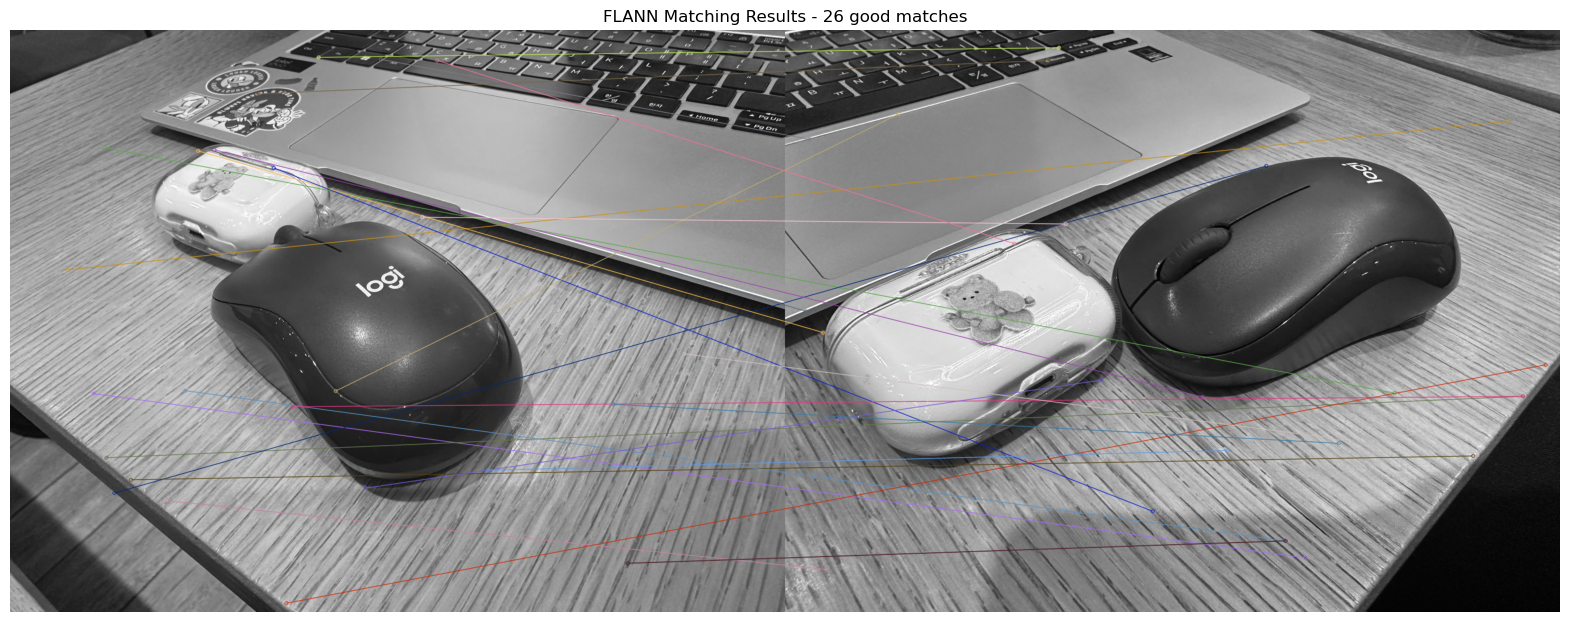

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 두 이미지를 로드
img1 = cv2.imread('./images/img1.jpg', cv2.IMREAD_GRAYSCALE)  # Query 이미지
img2 = cv2.imread('./images/img2.jpg', cv2.IMREAD_GRAYSCALE)  # Train 이미지

# SIFT 객체 생성
sift = cv2.SIFT_create()

# SIFT 특징점과 디스크립터 계산
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN 매칭 파라미터 설정
FLANN_INDEX_KDTREE = 1  # KDTree 사용
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # 탐색 횟수

# FLANN 기반 매처 생성
flann = cv2.FlannBasedMatcher(index_params, search_params)

# 디스크립터 매칭
matches = flann.knnMatch(des1, des2, k=2)

# Lowe's ratio test 적용
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# 매칭 결과 시각화
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 10))
plt.imshow(img_matches)
plt.title(f"FLANN Matching Results - {len(good_matches)} good matches")
plt.axis('off')
plt.show()
